### RNNLM 구현

In [13]:
import numpy as np
xs = np.array([[1,2,3]])
print(xs.shape)
print(xs[:,0])
print(xs[:,0].shape)
W = np.arange(28).reshape(7,4)
print(W[0])
print(W[[0]])

(1, 3)
[1]
(1,)
[0 1 2 3]
[[0 1 2 3]]


In [17]:
a = np.array([1,2,3])
a = a.reshape(-1,1)
print(a)

[[1]
 [2]
 [3]]


In [18]:
a = np.array([1,2,3])
a = a[:, np.newaxis]
print(a)

[[1]
 [2]
 [3]]


In [19]:
a = np.array([1,2,3])
a = a[np.newaxis, :]
print(a)

[[1 2 3]]


In [16]:
a = np.array([[1,2],
              [3,4]])
# b = 3
# b = np.array([2,2])
b = np.array([[2],[2]])
a+b   # (2,2) + (2,1) => (2,2) + (2,2)

array([[3, 4, 5],
       [5, 6, 7]])

In [10]:
import numpy as np
dx = np.arange(21).reshape(3,7)
mask = np.ones((3,))
print(mask)
print(mask.shape)
print(mask.reshape(3,1).shape)
print(mask[:, np.newaxis].shape)

dx * mask[:, np.newaxis]  # (3,7)*(3,1) => (3,7)*(3,7)

[1. 1. 1.]
(3,)
(3, 1)
(3, 1)


In [20]:
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()

### RNNLM의 학습 코드

In [21]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

corpus, word_to_id, id_to_word = ptb.load_data('train')
print(corpus.shape)
print(corpus[:100])
print(type(word_to_id))
print(id_to_word[25])

for i in range(100):
    print(id_to_word[corpus[i]], end=' ')
print()

print(word_to_id['centrust'])

vocab_size = int(max(corpus) + 1)
print('말뭉치 크기: %d, 어휘 수: %d' % (len(corpus), vocab_size))
print(len(word_to_id))

(929589,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 27 24 39 26 40 41 42 26 43
 32 44 45 46 24 47 26 27 28 29 48 49 41 42 50 51 52 53 54 55 35 36 37 42
 56 57 58 59 24 35 60 42 61 62 63 64 65 66 67 68 69 70 35 71 72 42 73 74
 75 35 46 42]
<class 'dict'>
pierre
aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> pierre <unk> N years old will join the board as a nonexecutive director nov. N <eos> mr. <unk> is chairman of <unk> n.v. the dutch publishing group <eos> rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate <eos> a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of 
4
말뭉치 크기: 929589, 어휘 수: 10000
10000


말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 401.80
| 에폭 2 | 퍼플렉서티 292.92
| 에폭 3 | 퍼플렉서티 228.45
| 에폭 4 | 퍼플렉서티 217.49
| 에폭 5 | 퍼플렉서티 205.79
| 에폭 6 | 퍼플렉서티 202.63
| 에폭 7 | 퍼플렉서티 199.69
| 에폭 8 | 퍼플렉서티 197.52
| 에폭 9 | 퍼플렉서티 191.85
| 에폭 10 | 퍼플렉서티 193.71
| 에폭 11 | 퍼플렉서티 189.95
| 에폭 12 | 퍼플렉서티 192.96
| 에폭 13 | 퍼플렉서티 190.57
| 에폭 14 | 퍼플렉서티 190.77
| 에폭 15 | 퍼플렉서티 190.24
| 에폭 16 | 퍼플렉서티 186.88
| 에폭 17 | 퍼플렉서티 184.53
| 에폭 18 | 퍼플렉서티 181.07
| 에폭 19 | 퍼플렉서티 183.38
| 에폭 20 | 퍼플렉서티 184.93
| 에폭 21 | 퍼플렉서티 181.99
| 에폭 22 | 퍼플렉서티 178.65
| 에폭 23 | 퍼플렉서티 177.81
| 에폭 24 | 퍼플렉서티 177.55
| 에폭 25 | 퍼플렉서티 178.13
| 에폭 26 | 퍼플렉서티 176.56
| 에폭 27 | 퍼플렉서티 172.04
| 에폭 28 | 퍼플렉서티 170.76
| 에폭 29 | 퍼플렉서티 165.85
| 에폭 30 | 퍼플렉서티 165.68
| 에폭 31 | 퍼플렉서티 165.49
| 에폭 32 | 퍼플렉서티 160.93
| 에폭 33 | 퍼플렉서티 158.58
| 에폭 34 | 퍼플렉서티 157.82
| 에폭 35 | 퍼플렉서티 153.75
| 에폭 36 | 퍼플렉서티 148.90
| 에폭 37 | 퍼플렉서티 148.60
| 에폭 38 | 퍼플렉서티 140.20
| 에폭 39 | 퍼플렉서티 136.11
| 에폭 40 | 퍼플렉서티 133.51
| 에폭 41 | 퍼플렉서티 133.70
| 에폭 42 | 퍼플렉서티 127.74
| 에폭 43 | 퍼플렉서티 121

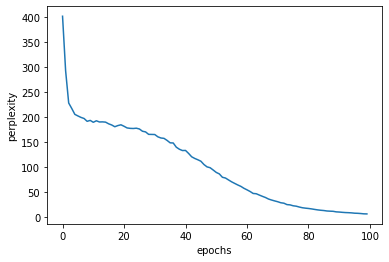

In [22]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
# print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


In [23]:
model.layers[0].W[1]

array([-4.81262570e-04,  3.02396659e-02,  1.52453380e-02,  1.00252675e-02,
        4.04203460e-02, -5.27097331e-03,  1.03128012e-02,  4.70167259e-04,
        2.60652956e-02, -5.68745285e-03, -8.33731756e-05,  1.08723417e-02,
        4.29834798e-02, -5.63965645e-03,  1.77494921e-02, -6.63868152e-03,
       -5.62104350e-03, -1.33662503e-02, -1.46371238e-02, -4.60795462e-02,
        1.53867714e-02, -5.43097919e-03, -3.75013016e-02,  1.95409488e-02,
        5.71980095e-03, -5.48739545e-03,  2.16728672e-02, -2.79114698e-03,
       -2.61404905e-02,  4.22959402e-02,  4.25251527e-03,  1.13041932e-02,
        2.05904506e-02, -2.48622559e-02,  4.73129563e-02, -1.55052980e-02,
        2.25556185e-04, -1.00465082e-02, -9.60528944e-03,  3.06100585e-02,
       -3.44741307e-02,  2.03754138e-02,  2.43513286e-03, -4.75874171e-02,
       -3.32227200e-02, -3.56742889e-02, -1.56985484e-02,  2.77729165e-02,
       -2.21836660e-02, -4.29016277e-02,  3.25590037e-02, -1.34887537e-02,
       -3.17368167e-03, -

### RNNLM의 Trainer 클래스

In [ ]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from simple_rnnlm import SimpleRnnlm
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()


In [ ]:
import numpy as np

out = np.zeros((2,3,4))
embed_W = np.arange(28).reshape(7,4)

idx = [0,3]
out[:,0,:] = embed_W[idx]
idx = [1,4]
out[:,1,:] = embed_W[idx]
idx = [2,1]
out[:,2,:] = embed_W[idx]

out



In [ ]:
import numpy as np

xs = np.arange(18).reshape(2,3,3)
print(xs)
rx  = xs.reshape(2*3,-1)
print(rx)